In [1]:
import time
from datetime import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

file_path =("/content/drive/MyDrive/data_date.csv")
df = pd.read_csv(file_path)
df

Mounted at /content/drive


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
15806,2024-10-24,United States of America,Unhealthy for Sensitive Groups,116
15807,2024-10-24,Uzbekistan,Unhealthy,180
15808,2024-10-24,Vatican,Moderate,53
15809,2024-10-24,Venezuela,Good,24


In [3]:
df.shape

(15811, 4)

**Data Preprocess**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15811 entries, 0 to 15810
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15811 non-null  object
 1   Country    15811 non-null  object
 2   Status     15811 non-null  object
 3   AQI Value  15811 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 494.2+ KB


In [5]:
df.isnull().sum()

,0
Date,0
Country,0
Status,0
AQI Value,0


In [6]:
df.duplicated().sum()

300

In [7]:
# Drop duplicate rows based on all co
df.drop_duplicates()


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
15806,2024-10-24,United States of America,Unhealthy for Sensitive Groups,116
15807,2024-10-24,Uzbekistan,Unhealthy,180
15808,2024-10-24,Vatican,Moderate,53
15809,2024-10-24,Venezuela,Good,24


In [8]:
df.columns

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')

In [9]:
df.nunique()

,0
Date,106
Country,142
Status,6
AQI Value,315


In [10]:
df=df.rename({'AQI Value':'AQI'},axis=1)

In [11]:
df.columns

Index(['Date', 'Country', 'Status', 'AQI'], dtype='object')

In [12]:
df.Country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

In [13]:
df.Status.unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [14]:
df.describe()

,AQI
count,15811.000000
mean,61.644931
std,48.409699
min,1.000000
25%,29.000000
50%,52.000000
75%,81.000000
max,963.000000


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

**Feature encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [17]:
df.head()

,Country,Status,AQI
Date,,,
2022-07-21,0,0,14
2022-07-21,1,2,65
2022-07-21,2,2,55
2022-07-21,3,4,113
2022-07-21,4,2,63


**Feature Engineering**

In [18]:
df['rolling_avg_aqi']=df['AQI'].rolling(window=7).mean()
df['high_pollution']=np.where(df['AQI'] > df['AQI'].quantile(0.75),1,0)
df['avg_aqi_high_pollution_days']=df['AQI'].where(df['high_pollution']==1).rolling(window=7).mean()

In [19]:
df.head(5)

,Country,Status,AQI,rolling_avg_aqi,high_pollution,avg_aqi_high_pollution_days
Date,,,,,,
2022-07-21,0,0,14,NaN,0,NaN
2022-07-21,1,2,65,NaN,0,NaN
2022-07-21,2,2,55,NaN,0,NaN
2022-07-21,3,4,113,NaN,1,NaN
2022-07-21,4,2,63,NaN,0,NaN


In [20]:
df.fillna(method='bfill', inplace=True)

<ipython-input-20-168d8f9d469d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [21]:
df.head(5)

,Country,Status,AQI,rolling_avg_aqi,high_pollution,avg_aqi_high_pollution_days
Date,,,,,,
2022-07-21,0,0,14,63.142857,0,NaN
2022-07-21,1,2,65,63.142857,0,NaN
2022-07-21,2,2,55,63.142857,0,NaN
2022-07-21,3,4,113,63.142857,1,NaN
2022-07-21,4,2,63,63.142857,0,NaN


In [22]:

df['avg_aqi_high_pollution_days'] = df['avg_aqi_high_pollution_days'].fillna(0)
df.head(5)


,Country,Status,AQI,rolling_avg_aqi,high_pollution,avg_aqi_high_pollution_days
Date,,,,,,
2022-07-21,0,0,14,63.142857,0,0.0
2022-07-21,1,2,65,63.142857,0,0.0
2022-07-21,2,2,55,63.142857,0,0.0
2022-07-21,3,4,113,63.142857,1,0.0
2022-07-21,4,2,63,63.142857,0,0.0


**Feature Scaling**

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling only to numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [24]:
df.head(5)

,Country,Status,AQI,rolling_avg_aqi,high_pollution,avg_aqi_high_pollution_days
Date,,,,,,
2022-07-21,0.000000,0.0,0.013514,0.200447,0.0,0.0
2022-07-21,0.007092,0.4,0.066528,0.200447,0.0,0.0
2022-07-21,0.014184,0.4,0.056133,0.200447,0.0,0.0
2022-07-21,0.021277,0.8,0.116424,0.200447,1.0,0.0
2022-07-21,0.028369,0.4,0.064449,0.200447,0.0,0.0


In [25]:
# Separate Target Variable
x=df.drop('AQI',axis=1)
y=df["AQI"]

**Train_test_split**

In [26]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

**ARIMA Model**

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(ytrain, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(ytest))

# Calculate Mean Squared Error
mse = mean_squared_error(ytest, forecast)
print(f'Mean Squared Error: {mse}')

print("Forecasted values:", forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 0.0022310071299831437
Forecasted values: 12648    0.055645
12649    0.053203
12650    0.054346
12651    0.053574
12652    0.050956
           ...   
15806    0.052369
15807    0.052369
15808    0.052369
15809    0.052369
15810    0.052369
Name: predicted_mean, Length: 3163, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


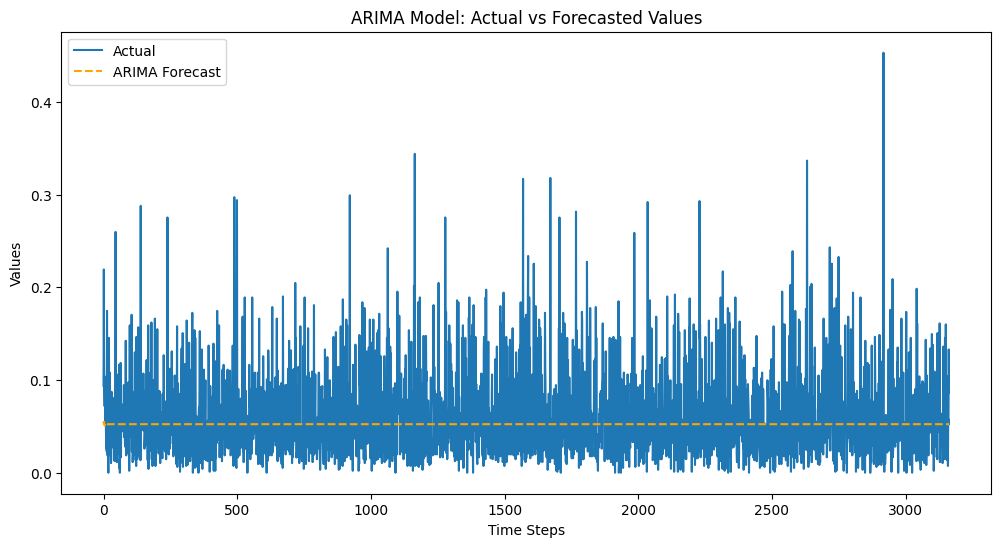

In [32]:
ytest_reset = ytest.reset_index(drop=True)
forecast_reset = pd.Series(forecast).reset_index(drop=True)

# Plot the ARIMA forecast vs actual values
plt.figure(figsize=(12, 6))
plt.plot(ytest_reset, label='Actual')
plt.plot(forecast_reset, label='ARIMA Forecast', linestyle='--', color='orange')
plt.title('ARIMA Model: Actual vs Forecasted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()


**LSTM Model**

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.metrics import mean_squared_error

#Reshape
Xtrain = np.array(Xtrain).reshape((Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.array(Xtest).reshape((Xtest.shape[0], Xtest.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(Xtrain, ytrain, epochs=50, batch_size=32, validation_data=(Xtest, ytest), verbose=1)

# Make predictions
predictions = model.predict(Xtest)

# Evaluate the model
mse = mean_squared_error(ytest, predictions)
print(f"Mean Squared Error: {mse}")

print("Predicted values:", predictions)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0017 - val_loss: 5.6581e-04
Epoch 2/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 9.2270e-04 - val_loss: 5.7894e-04
Epoch 3/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 8.3170e-04 - val_loss: 4.7812e-04
Epoch 4/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.7253e-04 - val_loss: 4.6155e-04
Epoch 5/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.3345e-04 - val_loss: 5.3009e-04
Epoch 6/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.7211e-04 - val_loss: 5.4954e-04
Epoch 7/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0012 - val_loss: 4.6005e-04
Epoch 8/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 8.5985e-04 - val_loss: 4.4736e-04
Epoch 9/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.6246e-04 - val_loss: 4.6144e-04
Epoch 10/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 8.2993e-04 - val_loss: 4.4080e-04
Epoch 11/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.8620e-04 -

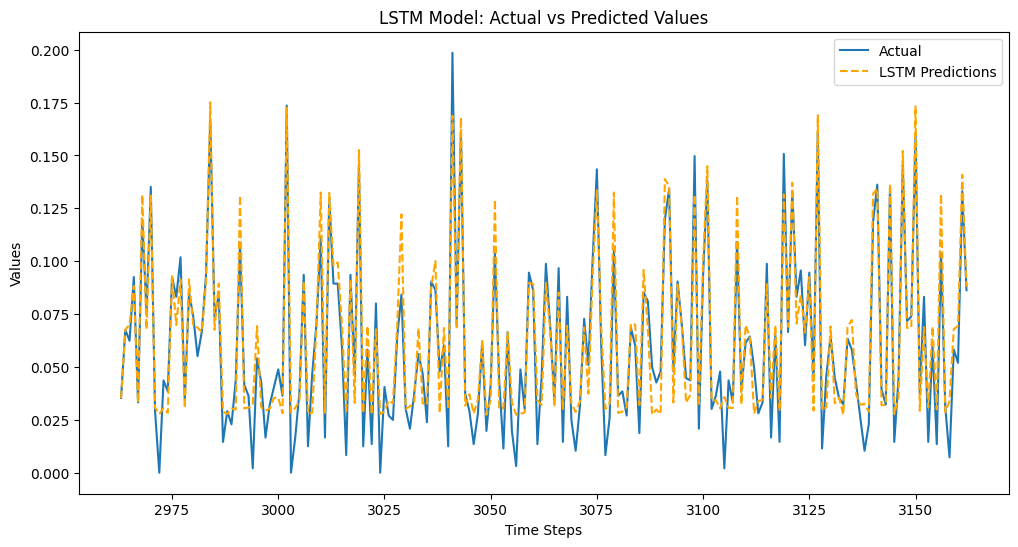

In [33]:
ytest_reset = ytest.reset_index(drop=True)
predictions_reset = pd.Series(predictions.reshape(-1)).reset_index(drop=True)

subset = 200
ytest_subset = ytest_reset[-subset:]
predictions_subset = predictions_reset[-subset:]

# Plot the LSTM predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(ytest_subset, label='Actual')
plt.plot(predictions_subset, label='LSTM Predictions', linestyle='--', color='orange')
plt.title('LSTM Model: Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()


**Calculate Health Risk Score**

In [34]:
def calculate_health_risk(AQI):
  if AQI<=50:
    return "Good"
  elif AQI<=100:
      return"Moderate"
  elif AQI<=150:
      return"Unhealthy for sensitive Groups"
  elif AQI<=200:
      return"Unhealthy"
  elif AQI<=300:
      return"Very Unhealthy"

  else:
    return "Hazardous"

risk_levels=[calculate_health_risk(AQI) for AQI in predictions]
print(risk_levels[:10])


['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']
